In [2]:
# Loading libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
path =r'C:\Users\marig\OneDrive\Área de Trabalho\curso arbeitsamt\data immersion\achievement 6\data sources\final project\Data\Original Data\infectious_diseases_outbreaks_cdc'

In [4]:
food_df_1 = pd.read_csv(os.path.join (path, 'food_outbreaks_cdc.csv'))

## Checking the data shape

In [5]:
food_df_1.shape

(8703, 16)

In [6]:
food_df_1.head()

,Year,Month,State,Primary Mode,Etiology,Serotype or Genotype,Etiology Status,Setting,Illnesses,Hospitalizations,Info on Hospitalizations,Deaths,Info on Deaths,Food Vehicle,Food Contaminated Ingredient,IFSAC Category
0,2011,1,Ohio,Food,NaN,NaN,NaN,Restaurant - Sit-down dining,2,0.0,2.0,0.0,2.0,pie,NaN,Multiple
1,2011,1,Ohio,Food,Norovirus Genogroup II,GII.4 New Orleans,Suspected,Restaurant - Sit-down dining,2,0.0,2.0,0.0,2.0,NaN,NaN,NaN
2,2011,1,Virginia,Food,Norovirus,NaN,Suspected,Restaurant - Sit-down dining,7,0.0,7.0,0.0,7.0,NaN,NaN,NaN
3,2011,1,Texas,Food,NaN,NaN,NaN,NaN,2,0.0,2.0,0.0,2.0,NaN,NaN,NaN
4,2011,1,Colorado,Food,Norovirus unknown,NaN,Confirmed,Grocery store,8,1.0,8.0,0.0,8.0,mixed fruit,NaN,Fruits


In [7]:
food_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8703 entries, 0 to 8702
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          8703 non-null   int64  
 1   Month                         8703 non-null   int64  
 2   State                         8703 non-null   object 
 3   Primary Mode                  8703 non-null   object 
 4   Etiology                      6672 non-null   object 
 5   Serotype or Genotype          2747 non-null   object 
 6   Etiology Status               6672 non-null   object 
 7   Setting                       8335 non-null   object 
 8   Illnesses                     8703 non-null   int64  
 9   Hospitalizations              8545 non-null   float64
 10  Info on Hospitalizations      8527 non-null   float64
 11  Deaths                        8578 non-null   float64
 12  Info on Deaths                8535 non-null   float64
 13  Foo

## Data consistency checks

In [8]:
# #changing variables that are not necessary for descriptive analysis to string
food_df_1 ['Year']= food_df_1 ['Year'].astype('string')


In [9]:
food_df_1 ['Month'] = food_df_1 ['Month'].astype ('string')

## Descriptive Analysis

In [10]:
food_df_1.describe()

,Illnesses,Hospitalizations,Info on Hospitalizations,Deaths,Info on Deaths
count,8703.000000,8545.000000,8527.000000,8578.000000,8535.000000
mean,16.868896,1.256641,14.495250,0.033691,14.778325
std,39.295911,6.810265,33.618675,0.441951,32.389580
min,2.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,3.000000,0.000000,3.000000
50%,7.000000,0.000000,6.000000,0.000000,6.000000
75%,17.000000,1.000000,14.000000,0.000000,15.000000
max,1132.000000,260.000000,778.000000,33.000000,720.000000


## Checking mixed data types

In [11]:
for col in food_df_1.columns.tolist():
  weird = (food_df_1[[col]].applymap(type) != food_df_1[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (food_df_1[weird]) > 0:
    print (col)

Etiology
Serotype or Genotype
Etiology Status
Setting
Food Vehicle
Food Contaminated Ingredient
IFSAC Category


In [12]:
# Fixing datatypes
food_df_1 ['Etiology'] = food_df_1['Etiology'].astype('str')

In [13]:
food_df_1 ['Serotype or Genotype'] = food_df_1['Serotype or Genotype'].astype('str')

In [14]:
food_df_1 ['Etiology Status'] = food_df_1['Etiology Status'].astype('str')

In [15]:
food_df_1 ['Setting'] = food_df_1['Setting'].astype('str')

In [16]:
food_df_1 ['Food Vehicle'] = food_df_1['Food Vehicle'].astype('str')

In [17]:
food_df_1 ['Food Contaminated Ingredient'] = food_df_1['Food Contaminated Ingredient'].astype('str')

In [18]:
food_df_1 ['IFSAC Category'] = food_df_1['IFSAC Category'].astype('str')

## Missing Values


In [19]:
food_df_1.isnull().sum()

Year                              0
Month                             0
State                             0
Primary Mode                      0
Etiology                          0
Serotype or Genotype              0
Etiology Status                   0
Setting                           0
Illnesses                         0
Hospitalizations                158
Info on Hospitalizations        176
Deaths                          125
Info on Deaths                  168
Food Vehicle                      0
Food Contaminated Ingredient      0
IFSAC Category                    0
dtype: int64

In [20]:
# First I'm going to exclude the columns that are not necessary for the analysis: Info on Hospitalizations and Info on deaths.
food_df_2 = food_df_1.drop (columns = ['Info on Hospitalizations'])

In [21]:
food_df_2 = food_df_2.drop (columns = ['Info on Deaths'])

In [22]:
food_df_2.head()

,Year,Month,State,Primary Mode,Etiology,Serotype or Genotype,Etiology Status,Setting,Illnesses,Hospitalizations,Deaths,Food Vehicle,Food Contaminated Ingredient,IFSAC Category
0,2011,1,Ohio,Food,nan,nan,nan,Restaurant - Sit-down dining,2,0.0,0.0,pie,nan,Multiple
1,2011,1,Ohio,Food,Norovirus Genogroup II,GII.4 New Orleans,Suspected,Restaurant - Sit-down dining,2,0.0,0.0,nan,nan,nan
2,2011,1,Virginia,Food,Norovirus,nan,Suspected,Restaurant - Sit-down dining,7,0.0,0.0,nan,nan,nan
3,2011,1,Texas,Food,nan,nan,nan,nan,2,0.0,0.0,nan,nan,nan
4,2011,1,Colorado,Food,Norovirus unknown,nan,Confirmed,Grocery store,8,1.0,0.0,mixed fruit,nan,Fruits


In [23]:
#creating a new df to show where are the missing values
food_df_test = food_df_2 [food_df_2 ['Hospitalizations'].isnull() == True]

In [24]:
food_df_test

,Year,Month,State,Primary Mode,Etiology,Serotype or Genotype,Etiology Status,Setting,Illnesses,Hospitalizations,Deaths,Food Vehicle,Food Contaminated Ingredient,IFSAC Category
30,2011,2,Illinois,Food,nan,nan,nan,Private home/residence; Grocery store,13,NaN,0.0,"deli meat, multiple; bread, unspecified",nan,Multiple
73,2011,1,Oregon,Food,Norovirus Genogroup II,nan,Confirmed,Restaurant - Sit-down dining,22,NaN,NaN,nan,nan,nan
174,2011,4,Massachusetts,Food,Norovirus Genogroup I,nan,Confirmed,Restaurant - Sit-down dining,197,NaN,0.0,nan,nan,nan
239,2011,6,Ohio,Food,nan,nan,nan,nan,5,NaN,0.0,nan,nan,nan
305,2011,7,Kentucky,Food,nan,nan,nan,nan,9,NaN,NaN,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8252,2020,11,Maine,Food,nan,nan,nan,Caterer (food prepared off-site from where ser...,75,NaN,NaN,turkey,turkey,Turkey
8263,2021,5,Indiana,Food,Clostridium perfringens,nan,Suspected,Private home/residence,21,NaN,0.0,nan,nan,nan
8535,2021,1,Washington,Food,Norovirus,nan,Suspected,Private home/residence,3,NaN,0.0,"oysters, raw","oysters, raw",Mollusks
8601,2020,4,Ohio,Food,nan,nan,nan,Restaurant - other or unknown type,4,NaN,NaN,nan,nan,nan


In [25]:
# As there are few values in the columns hospitalizations and deaths that are missing, and both are numeric variables, I decided
# to replace then with the median because it will have less chance to be influenced by outliers (I know that the outliers will exist in this dataset because some outbreaks can lead to a high number of deaths)

<Axes: >

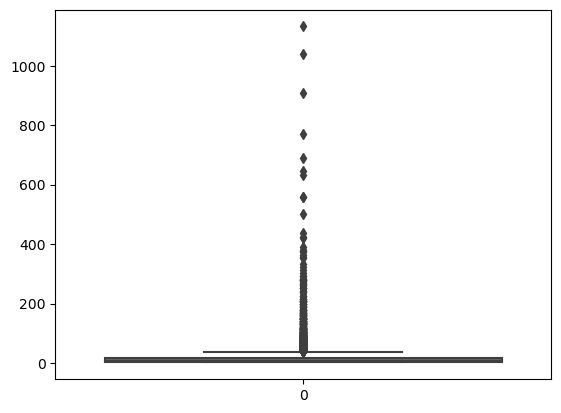

In [26]:
# Confirming the ouliers with boxplot
sns.boxplot (food_df_2 ['Illnesses'])

<Axes: >

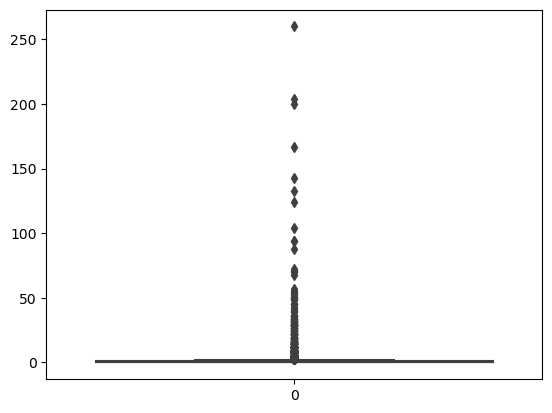

In [27]:
sns.boxplot (food_df_1 ['Hospitalizations'])

<Axes: >

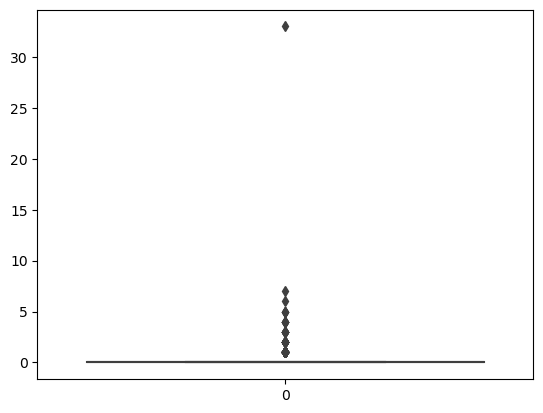

In [28]:
sns.boxplot (food_df_1 ['Deaths'])

The 3 Boxplot charts show us that there are many outliers in the columns Illness, Hospitalizations and Deaths. This confirms that the best option to replace here is the median.

In [29]:
food_df_2.median ()

C:\Users\marig\AppData\Local\Temp\ipykernel_7584\2009220547.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  food_df_2.median ()


Illnesses           7.0
Hospitalizations    0.0
Deaths              0.0
dtype: float64

In [30]:
food_df_2['Hospitalizations'] = food_df_2['Hospitalizations'].fillna(food_df_2['Hospitalizations'].median())

In [31]:
food_df_2['Deaths'] = food_df_2['Deaths'].fillna(food_df_2['Deaths'].median())

In [32]:
food_df_2.isnull().sum()

Year                            0
Month                           0
State                           0
Primary Mode                    0
Etiology                        0
Serotype or Genotype            0
Etiology Status                 0
Setting                         0
Illnesses                       0
Hospitalizations                0
Deaths                          0
Food Vehicle                    0
Food Contaminated Ingredient    0
IFSAC Category                  0
dtype: int64

In [33]:
food_df_2.describe()

,Illnesses,Hospitalizations,Deaths
count,8703.000000,8703.000000,8703.000000
mean,16.868896,1.233827,0.033207
std,39.295911,6.750241,0.438783
min,2.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000
50%,7.000000,0.000000,0.000000
75%,17.000000,1.000000,0.000000
max,1132.000000,260.000000,33.000000


<Axes: >

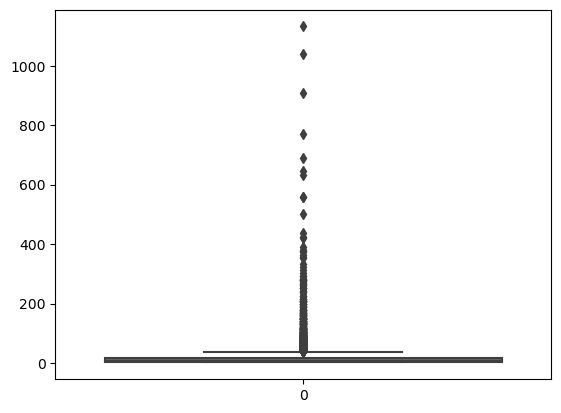

In [34]:
sns.boxplot (food_df_2 ['Illnesses'])

## Duplicates check

In [35]:
df_dups = food_df_2[food_df_2.duplicated()]

In [36]:
# No duplicates found

### Exporting df


In [38]:
food_df_2.to_csv(os.path.join(path, 'Prepared data' 'food_safety_cdc_2.csv', index = False))

TypeError: join() got an unexpected keyword argument 'index'